1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [5]:
import pandas as pd
import numpy as np
import numpy.random as npr
npr.seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats 
import seaborn as sns

<ErrorbarContainer object of 3 artists>

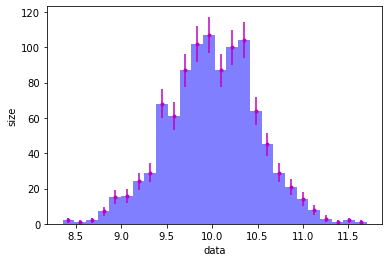

In [33]:
mean = 10
std = 0.5
N = 1000 
X = np.random.normal(mean,std,N)
entries, edges, _ = plt.hist(X, bins = 'auto', color='b',alpha=0.5)
plt.ylabel('size')
plt.xlabel('data')
bc = 1/2 * (edges[:-1] + edges[1:])
plt.errorbar(bc, entries, yerr=np.sqrt(entries), fmt='m.')

Text(0.5, 1.0, 'Main')

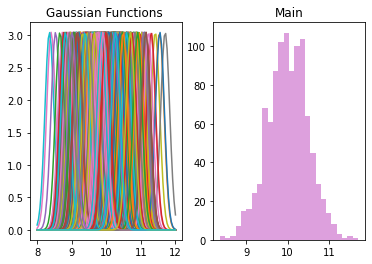

In [34]:
fig, (ax_1, ax_2) = plt.subplots(nrows=1, ncols=2)

std = 1.06*X.std()*X.size**(-1/5)  
for i in X:
    x = np.linspace(8,12,100)
    mean = i
    ax_1.plot(x, stats.norm.pdf(x, mean, std))
ax_1.set_title('Gaussian Functions ')
ax_2.hist(X, bins = 'auto', color='plum')
ax_2.set_title('Main')

Text(0.5, 1.0, 'Kernel Density Estimate')

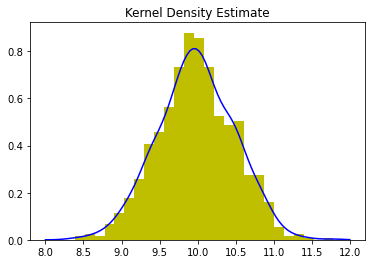

In [10]:
x = np.linspace(8,12,100)
std = 1.06*X.std()*X.size**(-1/5)  

l = []
for j in range(1000):
    gs_j = stats.norm.pdf(x, X[j], std)    
    l.append(gs_j)                         

        
sl = []
for i in range(100):
    el_i = np.array([l[k][i] for k in range(len(l))])  
    sl.append(np.sum(el_i))                     
    
nm = scipy.integrate.trapz(sl,x)
plt.plot(x, sl/nm, c='b')
plt.hist(X, bins = 'auto', color='y', density=True,)
plt.title('Kernel Density Estimate')

G:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Kernel Density Estimate with Seaborn')

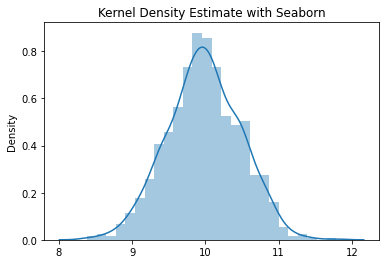

In [12]:
sns.distplot(X)
plt.title('Kernel Density Estimate with Seaborn')

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [ ]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

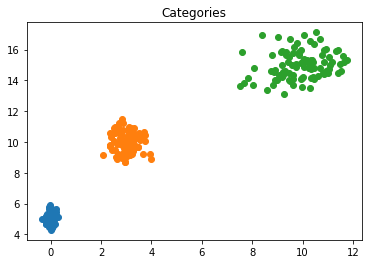

In [31]:
def generate_data(means, stds, N, n_cat=2):
    data = np.zeros((N, 2, n_cat))
    for i in range(n_cat):
        data[:,0, i] = np.random.normal(means[i, 0], stds[i, 0], N)
        data[:, 1, i] = np.random.normal(means[i, 1], stds[i, 1], N)
    return data

n_cat = 3
means = np.array([[0,5], [3,10], [10, 15]])
stds = np.array([[0.1, 0.3], [0.4, 0.7], [0.9, 0.9]])
data = generate_data(means, stds, 100, n_cat)

for i in range(n_cat):
    plt.scatter(data[:,0,i],data[:,1,i])
plt.title("Categories")
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


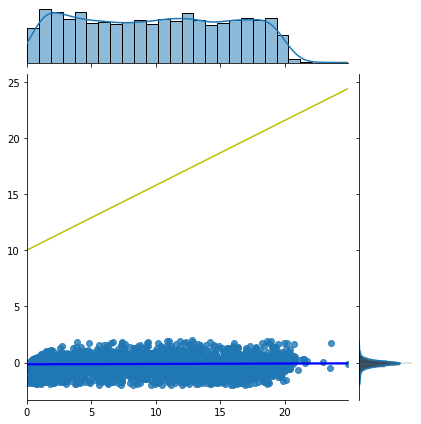

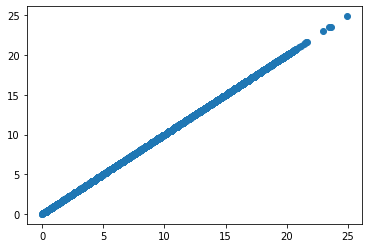

In [32]:

path = 'C:/Users/Eli/Downloads/residuals_261.npy'
data = pd.DataFrame(np.load(path, allow_pickle=True).item())
data.head()

data = data[abs(data['residuals']) < 2]
data.head()

residuals_ = data['residuals'].to_numpy()
distances_ = data['distances'].to_numpy()
reg = scipy.stats.linregress(residuals_,distances_)

plot = sns.jointplot(distances_, residuals_, kind="reg", joint_kws={'line_kws':{'color':'blue'}})

xr = plot.ax_joint.get_xlim()
y = np.array(xr)*reg[0]+reg[1]
plot.ax_joint.plot(xr, y, color='y')
plt.show()


n_bins = 10
x = np.linspace(distances_.min(),distances_.max(),num=n_bins+1)
x = x + (x[1]-x[0])/2
x = x[:-1]
data["bin"] = np.floor(data["distances"] / (x[1]-x[0]))
y = data.groupby('bin').mean()["residuals"].to_list()
y = y[:-1]
erry = data.groupby('bin').std()["residuals"].to_list()
erry = erry[:-1]
plt.scatter(distances_,distances_)